## Week 9
## Exercise 1 – Clustering

In [6]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering

In [7]:
df = pd.read_excel("Online Retail.xlsx", parse_dates=True)
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


### Cleaning 

In [8]:
df = df.dropna()
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [9]:
df.duplicated().sum()

5225

In [10]:
df.drop_duplicates()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


### Q1) Read and write a summary of the metadata

### Summary of dataset:
#### Characteristics:
- Multivariate
- Sequential
- Time-series

#### Number of instances: 541909

#### Attribute characteristics:
- Integer
- Real

#### Number of attributes: 8

In [11]:
pd.DataFrame(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    406829 non-null  object        
 1   StockCode    406829 non-null  object        
 2   Description  406829 non-null  object        
 3   Quantity     406829 non-null  int64         
 4   InvoiceDate  406829 non-null  datetime64[ns]
 5   UnitPrice    406829 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      406829 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.9+ MB


""


In [12]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,406829.000000,406829.000000,406829.000000
mean,12.061303,3.460471,15287.690570
std,248.693370,69.315162,1713.600303
min,-80995.000000,0.000000,12346.000000
25%,2.000000,1.250000,13953.000000
50%,5.000000,1.950000,15152.000000
75%,12.000000,3.750000,16791.000000
max,80995.000000,38970.000000,18287.000000


### Q2)  Select only the transactions that have occurred from 01/04/ 2011 and 09/12/2011 and create a dataset

In [13]:
start_date = pd.to_datetime("01/04/2011")
end_date = pd.to_datetime("09/12/2011")
df = df.loc[(df["InvoiceDate"] >= start_date) & (df["InvoiceDate"] <= end_date)]

### Q3) Calculate the RFM values for each customer (by customer id). RFM represents:
- R (Recency) − Recency should be calculated as the number of months before he 
or she has made a purchase from the online store. If he/she made a purchase in 
the month of December 2011, then the Recency should be 0. If purchase is made 
in November 2011 then Recency should be 1 and so on and so forth.
- F (Frequency) − Number of invoices by the customer from 01/04/ 2011 and 
09/12/2011.
- M (Monetary Value) − Total spend by the customer from 01/04/ 2011 and 
09/12/2011.


In [14]:
# Recency
recency = df.groupby(by="CustomerID", as_index=False)["InvoiceDate"].max()
recency.columns = ["CustomerID", "LastPurchaseDate"]
recent_date = recency["LastPurchaseDate"].max()
recent_date

recency["Recency"] = recency["LastPurchaseDate"].apply(lambda x: (recent_date - x).days)
recency

,CustomerID,LastPurchaseDate,Recency
0,12346.0,2011-01-18 10:17:00,236
1,12347.0,2011-08-02 08:48:00,40
2,12348.0,2011-04-05 10:47:00,159
3,12350.0,2011-02-02 16:01:00,221
4,12352.0,2011-03-22 16:08:00,173
...,...,...,...
3220,18280.0,2011-03-07 09:52:00,188
3221,18281.0,2011-06-12 10:53:00,91
3222,18282.0,2011-08-09 15:10:00,33
3223,18283.0,2011-09-05 12:35:00,6


In [15]:
# Frequency
temp = df.drop_duplicates(subset=["InvoiceNo", "CustomerID"], keep="first")
freq = temp.groupby(by="CustomerID", as_index=False)["InvoiceNo"].count()
freq.columns = ["CustomerID", "Frequency"]
freq

,CustomerID,Frequency
0,12346.0,2
1,12347.0,4
2,12348.0,2
3,12350.0,1
4,12352.0,8
...,...,...
3220,18280.0,1
3221,18281.0,1
3222,18282.0,2
3223,18283.0,10


In [16]:
# Monetary
df["TotalCost"] = df["Quantity"] * df["UnitPrice"]
monetary = df.groupby(by="CustomerID", as_index=False).agg({"TotalCost": "sum"})
monetary.columns = ["CustomerID", "Monetary"]
monetary

,CustomerID,Monetary
0,12346.0,0.00
1,12347.0,2079.07
2,12348.0,594.44
3,12350.0,334.40
4,12352.0,601.18
...,...,...
3220,18280.0,180.60
3221,18281.0,80.82
3222,18282.0,98.76
3223,18283.0,1120.67


### Q4) Use the elbow method to identify how many customer segments exist, using the RFM values for each customer.

In [17]:
df['R'] = 12-df["InvoiceDate"].dt.month
customer_ids = list(df['CustomerID'].unique())
rfm_df = pd.DataFrame(customer_ids, columns=['Customer ID'])

df['F'] = 0
customer_ids = list(df['CustomerID'].unique())
for id in customer_ids:
  df.loc[df['CustomerID']==id, 'F'] += df.groupby(by='CustomerID').InvoiceNo.size()[id]

df['Revenue'] = df.Quantity * df.UnitPrice
df['M'] = 0
for id in customer_ids:
  df.loc[df['CustomerID']==id, 'M'] += df.groupby(by='CustomerID').Revenue.sum()[id]

rfm_df['R'] = 0
rfm_df['F'] = 0
rfm_df['M'] = 0


for id in customer_ids:
    rfm_df.loc[rfm_df['Customer ID']==id, 'R'] += df.loc[df['CustomerID']==id, 'R'].values[0]
    rfm_df.loc[rfm_df['Customer ID']==id, 'F'] += df.loc[df['CustomerID']==id, 'F'].values[0]
    rfm_df.loc[rfm_df['Customer ID']==id, 'M'] += df.loc[df['CustomerID']==id, 'M'].values[0]

print("No of customer segments that exit is :")
print(rfm_df['R'].unique().size)
print("They are :")
rfm_df['R'].unique()

No of customer segments that exit is :
9
They are :


array([11, 10,  9,  8,  7,  6,  5,  4,  3], dtype=int64)

### Q5) Create the customer segments with K-means algorithm by using number of clusters is suggested by elbow method.

c:\Users\ragas\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=13.
  warnings.warn(


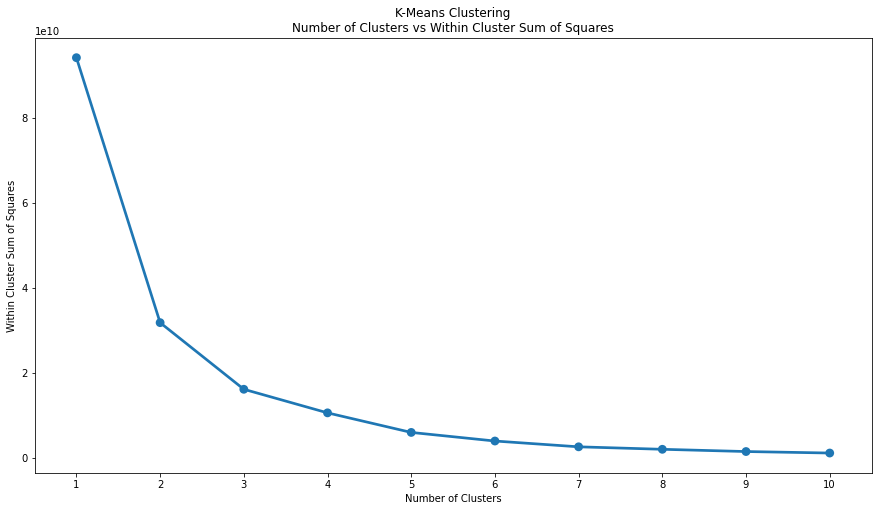

In [18]:
import matplotlib.pyplot as plt

wcss = []

for k in range(0, 10):
  kmeans = KMeans(n_clusters=k+1, random_state=0).fit(rfm_df[['R', 'F', 'M']])
  wcss.append(kmeans.inertia_)

plt.figure(figsize=(15,8))
ax = sns.pointplot(x=list(range(1, 11)), y=wcss)
ax.set_title('K-Means Clustering\nNumber of Clusters vs Within Cluster Sum of Squares')
ax.set_xlabel('Number of Clusters')
ax.set_ylabel('Within Cluster Sum of Squares')
plt.show()

### Q6) Plot the clusters in a scatter plot and mark each segment differently using lmplot

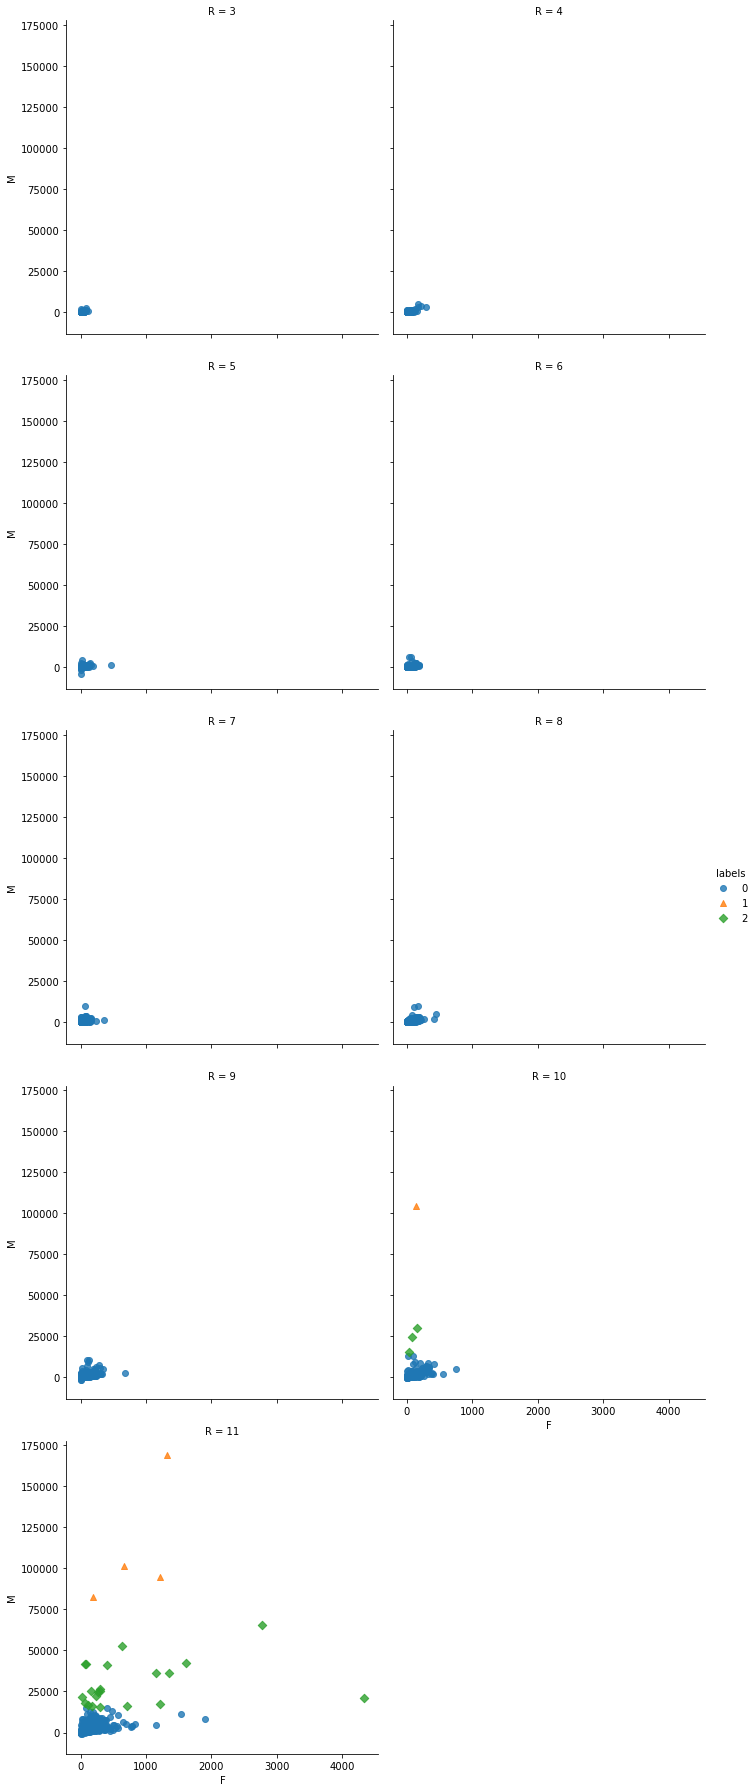

In [19]:
kmeans = KMeans(n_clusters=3, random_state=0).fit(rfm_df[['R', 'F', 'M']])
rfm_df['labels'] = kmeans.labels_
sns.lmplot(x='F', y='M', col='R', hue='labels', data=rfm_df, col_wrap=2, fit_reg=False, markers=['o', '^', 'D'])

### Q7) Print the cluster centers of each customer segment and explain them intuitively

In [24]:
print("The cluster centres are :")
print(kmeans.cluster_centers_)
print()
print("The cluster centre of cluster:")
print("0 has a value of 4.38 for R, 68.6 for F, and 1212 for M (customers with Low Recency, Low Frequency and Low Monetary Value) - customers who are of little value.")
print()
print("1 has a value of 4.00 for R, 1296 for F, and 168158 for M (customers with Low Recency, High Frquency and High Monetary Value) - loyal customers.")
print()
print("2 has a value of 5.25 for R, 865 for F, and 39738 for M (customers with Low Recency, Medium Frequency, and Medium Monetary Value) - occasional shoppers.")
print()
print("The wcss values are calculated by summing up the squared distaces between points and their cluster centers to analyze the quality of clusters(less the wcss,higher the quality)")

The cluster centres are :
[[8.37734668e+00 6.17234043e+01 1.05365020e+03]
 [1.08000000e+01 7.04600000e+02 1.10361006e+05]
 [1.08750000e+01 6.88250000e+02 2.89201596e+04]]

The cluster centre of cluster:
0 has a value of 4.38 for R, 68.6 for F, and 1212 for M (customers with Low Recency, Low Frequency and Low Monetary Value) - customers who are of little value.

1 has a value of 4.00 for R, 1296 for F, and 168158 for M (customers with Low Recency, High Frquency and High Monetary Value) - loyal customers.

2 has a value of 5.25 for R, 865 for F, and 39738 for M (customers with Low Recency, Medium Frequency, and Medium Monetary Value) - occasional shoppers.

The wcss values are calculated by summing up the squared distaces between points and their cluster centers to analyze the quality of clusters(less the wcss,higher the quality)


### Q8) Create the customer segments with Agglomerative algorithm by using number of clusters is suggested by elbow method.

In [21]:
agglo = AgglomerativeClustering(n_clusters=3, compute_distances=True).fit(rfm_df[['R','F','M']])
agglo

AgglomerativeClustering(compute_distances=True, n_clusters=3)

### Q9) Visualize the clusters using the dendrogram

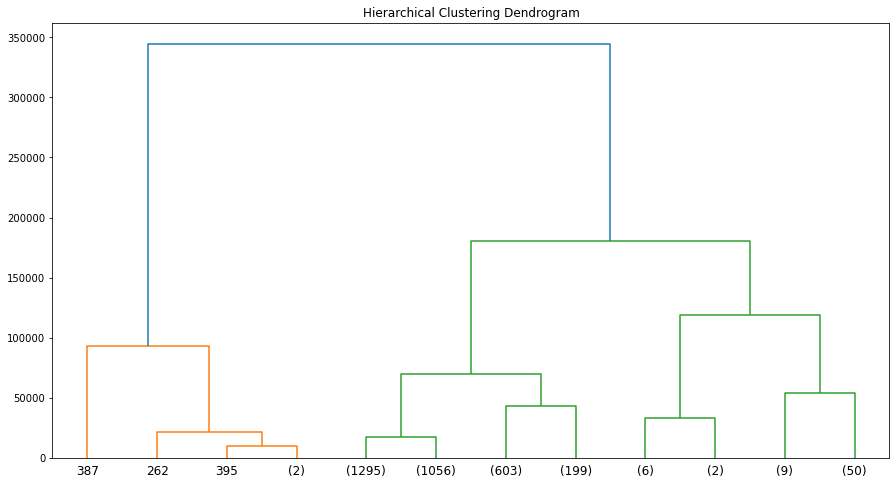

In [22]:
from scipy.cluster.hierarchy import dendrogram
import matplotlib.pyplot as plt

def plot_dendrogram(agglo, **kwargs):
    counts = np.zeros(agglo.children_.shape[0])
    n_samples = len(agglo.labels_)
    for i, merge in enumerate(agglo.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([agglo.children_, agglo.distances_, counts]).astype(float)

    dendrogram(linkage_matrix, **kwargs)
    

plt.figure(figsize=(15,8))
plt.title('Hierarchical Clustering Dendrogram')
plot_dendrogram(agglo, truncate_mode='level', p=3)
plt.show()

### Q10) Compare the clusters obtained using KMeans vs. Agglomeration

In [23]:
labels_kmeans = list(kmeans.labels_)


labels_agglo = list(agglo.labels_)


print('Cluster 0 - KMeans: ', labels_kmeans.count(0))
print('Cluster 1 - KMeans: ', labels_kmeans.count(1))
print('Cluster 2 - KMeans: ', labels_kmeans.count(2))

print()

print('Cluster 0 - Agglomerative: ', labels_agglo.count(0))
print('Cluster 1 - Agglomerative: ', labels_agglo.count(1))
print('Cluster 2 - Agglomerative: ', labels_agglo.count(2))

Cluster 0 - KMeans:  3196
Cluster 1 - KMeans:  5
Cluster 2 - KMeans:  24

Cluster 0 - Agglomerative:  67
Cluster 1 - Agglomerative:  5
Cluster 2 - Agglomerative:  3153
